# 다중 회귀 
* 여러 개의 특성을 사용한 선형 회귀
* 1개의 특성을 사용: 선형 회귀 모델이 학습하는 것은 '직선'
* 2개의 특성을 사용: 선형 회귀 모델이 학습하는 것은 '평면'

### 데이터 준비

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [2]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9559326821885706
0.8796419177546366


### 사이킷런의 변환기
* 변환기(transformer) : 특성을 만들거나 전처리하기 위한 클래스

In [6]:
# 변환기: PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# 차수: 2, 절편 생성: X
poly = PolynomialFeatures(degree=2, include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.fit_transform(test_input)

In [7]:
print(train_poly.shape)
print(test_poly.shape)

(42, 9)
(14, 9)


* get_feature_names() : 특성이 각각 어떤 입력의 조합으로 만들어졌는지 출력 

In [8]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [9]:
# 다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594155


---

### 규제 (regularization)

* 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 
* 즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
* 선형 회귀 모델의 경우, 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984

* 규제를 적용하기 전에 먼저 정규화를 진행한다. 평균과 표준편차를 직접 구해 특성을 표준점수로 변환한다. 
* 사이킷럿에서 제공하는 StandardScaler 클래스를 사용 

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지와 라쏘 
* 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부름
* 릿지 (ridge) : 계수를 제곱한 값을 기준으로 규제를 적용
* 라쏘 (lasso) :  계수의 절대값을 기준으로 규제를 적용 
* 일반적으로 릿지를 조금 더 선호함.
* 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있음

### 릿지 (Ridge)

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9857915060511934
0.9835057194929057


In [12]:
print(ridge.coef_)
print(ridge.intercept_)

[-14.8457435  -13.99600726 -32.35418375  74.19692179  78.1435485
  60.69735429  82.15125951  64.36969483  49.56283536]
400.83333333333326


In [13]:
import matplotlib.pyplot as plt

In [14]:
train_score = []
test_score = []

# alpha : 크게 할 수록 규제를 강하게 적용
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)

    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

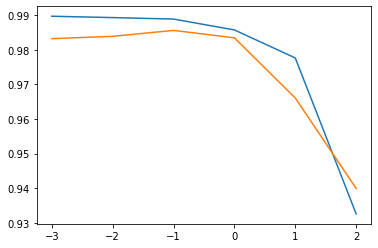

In [15]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

### 라쏘 (Lasso)

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.986591255464559
0.9846056618190413


In [17]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\LimDongKyu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24660.438636394385, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\LimDongKyu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8738.521394204236, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


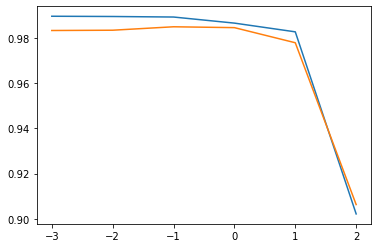

In [18]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()